## Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       # Standard plotting library


# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
application_train_ = pd.read_csv('data/application_train.csv')
train_size_ = application_train_.shape[0]
application_test_ = pd.read_csv('data/application_test.csv')
data = pd.concat((application_train_, application_test_)).reset_index(drop=True)

# Success - Display the first record
display(data.head(n=5))


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Total number of records
n_records = data.shape[0]

# Total of repaid loans
n_paid = len(np.where(data['TARGET'] == 0)[0])

# Total of default loans
n_default = len(np.where(data['TARGET'] == 1)[0])

#Total of applicatns with income greater than 100K
n_greater_100k = len(np.where(data['AMT_INCOME_TOTAL'] >= 100000.0 )[0])

#Total of applicatns with income below than 100K
n_below_100k = len(np.where(data['AMT_INCOME_TOTAL'] < 100000.0 )[0])

print("Total number of loan applications: {}".format(n_records))
print("Total number of loan application that were fully paid: {}".format(n_paid))
print("Total number of loan applications that defaulted: {}".format(n_default))
print("Total number of applicants with income greater than 100K: {}".format(n_greater_100k))
print("Total number of applicants with income below 100K: {}".format(n_below_100k))


Total number of loan applications: 356255
Total number of loan application that were fully paid: 282686
Total number of loan applications that defaulted: 24825
Total number of applicants with income greater than 100K: 284721
Total number of applicants with income below 100K: 71534


In [4]:
display(data.describe())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
count,356219.000000,3.562550e+05,3.559770e+05,3.562550e+05,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,...,356255.000000,356255.000000,307511.000000,185200.000000,183392.000000,183392.000000,183392.000000,119949.000000,119949.000000,119949.000000
mean,27425.560657,5.877674e+05,5.280200e+05,1.701161e+05,0.006281,0.005808,0.231697,0.304399,0.029995,1.911564,...,0.051371,278128.000000,0.080729,0.103193,0.977889,0.977903,0.977239,0.752283,0.755548,0.759452
std,14732.808190,3.986237e+05,3.660650e+05,2.235068e+05,0.104250,0.079736,0.855949,0.786915,0.191374,1.865338,...,0.220753,102842.104413,0.272419,0.108041,0.057929,0.058562,0.063165,0.113267,0.112057,0.110112
min,1615.500000,4.500000e+04,4.050000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16731.000000,2.700000e+05,2.340000e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,189064.500000,0.000000,0.041500,0.976700,0.976700,0.976700,0.687200,0.691400,0.699400
50%,25078.500000,5.002110e+05,4.500000e+05,1.530000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,278128.000000,0.000000,0.069000,0.981600,0.981600,0.981600,0.755200,0.758500,0.764800
75%,34960.500000,7.975575e+05,6.750000e+05,2.025000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,367191.500000,0.000000,0.128700,0.986600,0.986600,0.986600,0.823200,0.825600,0.823600
max,258025.500000,4.050000e+06,4.050000e+06,1.170000e+08,9.000000,4.000000,27.000000,261.000000,8.000000,25.000000,...,1.000000,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that we have many columns that have high variance

### Handle Missing Data


Now that we have successfully transformed skewed data in our dataset, we need to also normalize all numerical features in the data set. This can be done by applying some type of scaling on the numerical features. Normalization ensures data are treated equally during supervised learning by having equal scale.

Before we start normalizing our dataset, we need to deal with missing data. We will need to either remove or correct them depending on the number of missing values for each feature. 

In [5]:
for feature in data: 
    missing_total = data[feature].isnull().sum()
    if missing_total > 0:
        print("Missing", missing_total, 'from', feature, 'which represents {:.04}%'.format((missing_total / len(data))*100))

Missing 36 from AMT_ANNUITY which represents 0.01011%
Missing 278 from AMT_GOODS_PRICE which represents 0.07803%
Missing 47568 from AMT_REQ_CREDIT_BUREAU_DAY which represents 13.35%
Missing 47568 from AMT_REQ_CREDIT_BUREAU_HOUR which represents 13.35%
Missing 47568 from AMT_REQ_CREDIT_BUREAU_MON which represents 13.35%
Missing 47568 from AMT_REQ_CREDIT_BUREAU_QRT which represents 13.35%
Missing 47568 from AMT_REQ_CREDIT_BUREAU_WEEK which represents 13.35%
Missing 47568 from AMT_REQ_CREDIT_BUREAU_YEAR which represents 13.35%
Missing 179948 from APARTMENTS_AVG which represents 50.51%
Missing 179948 from APARTMENTS_MEDI which represents 50.51%
Missing 179948 from APARTMENTS_MODE which represents 50.51%
Missing 207584 from BASEMENTAREA_AVG which represents 58.27%
Missing 207584 from BASEMENTAREA_MEDI which represents 58.27%
Missing 207584 from BASEMENTAREA_MODE which represents 58.27%
Missing 2 from CNT_FAM_MEMBERS which represents 0.0005614%
Missing 248360 from COMMONAREA_AVG which repres

From above lines, we can see that we are missing many feature values. However, we're not interested in all of the features. Therefore, we will only preprocess the below features and make sure they're fully processed. 
AMT_ANNUITY

        - Missing 12 from AMT_ANNUITY which represents 0.003902%
        - Missing 278 from AMT_GOODS_PRICE which represents 0.0904%
        - Missing 1292 from NAME_TYPE_SUITE which represents 0.4201%
        - Missing 202929 from OWN_CAR_AGE which represents 65.99%
        - Missing 96391 from OCCUPATION_TYPE which represents 31.35%
        - Missing 2 from CNT_FAM_MEMBERS which represents 0.0006504%

Lucky for us that half of the features we're interested in don't have too many missing values. We will delete all rows with missing values for all the above features except NAME_TYPE_SUITE, OWN_CAR_AGE and OCCUPATION_TYPE.

NAME_TYPE_SUITE missing values count is quite large and may affect our final results in case we delete the missing feature values. We wil replace the missing values with the most common one since it is a categorical feature

OWN_CAR_AGE is missing values for those whom do not own a car. Therefore, we will replace missing values with 0 as an indication for not owning a car.

In [6]:
print("Let's find out the most common feature value for NAME_TYPE_SUITE...\n")
print(data['NAME_TYPE_SUITE'].value_counts())
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna('Unaccompanied')
print('\nNow dataset has', data['NAME_TYPE_SUITE'].isnull().sum(), 'NaN values for NAME_TYPE_SUITE')


Let's find out the most common feature value for NAME_TYPE_SUITE...

Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

Now dataset has 0 NaN values for NAME_TYPE_SUITE


In [7]:
#Handle OWN_CAR_AGE Missing values. 
car_owners_total = len(np.where(data['FLAG_OWN_CAR'] == 'N')[0]) # Count of applicants not owning a car
missing_car_age_total = data['OWN_CAR_AGE'].isnull().sum() # Count of records missing car age 

#Replace NaN values with 0s for those applicants not owning a car
data['OWN_CAR_AGE'] = data.apply( 
    lambda row: 0 if row['FLAG_OWN_CAR'] == 'N' else (0 if row['FLAG_OWN_CAR'] == 'Y' and np.isnan(row['OWN_CAR_AGE']) else row['OWN_CAR_AGE']),
    axis=1
)

missing_car_age_total_AFTER_replacement = data['OWN_CAR_AGE'].isnull().sum()

print('Dataset is missing', missing_car_age_total, "applicants car age")
print('Completed replacement of', missing_car_age_total - missing_car_age_total_AFTER_replacement,'NaN values')


Dataset is missing 235241 applicants car age
Completed replacement of 235241 NaN values


In [8]:
#Handle missing Occupation type
missing_occupation = data[data['OCCUPATION_TYPE'].isnull()]
missing_occupation['NAME_INCOME_TYPE'].value_counts()
pen = data[data['NAME_INCOME_TYPE'] == 'Pensioner']

In [9]:
#Remove records where missing features are less than 5% of total dataset
target = data['TARGET'] # test dataset contains NaNs. lets not drop this column 
data = data.dropna(subset=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'])

a = data.isnull().sum()
nan_columns = a.index[a > 0].tolist()
#drop other columns containing NaN values
data = data.drop(columns=nan_columns)
data['TARGET'] = target


In [10]:
[col for col in data if data[col].dtype == 'object']

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [19]:
#replace XNA gender with F since they're the most common
data['CODE_GENDER'].replace('XNA', 'F', inplace=True)

In [24]:
data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [689]:
# Feature engineering
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data["AGE"] = data["DAYS_BIRTH"].abs()//365
data['Long_employment'] = (data['DAYS_EMPLOYED'] < (-365)*5).astype(int) #True if >= 5 years of employment, False otherwist
data['Age_38up'] = (data['DAYS_BIRTH'] < (-365*38)).astype(int) #True if older than 38, False otherwise

# Ratio feature engineering
data['ratio_annuity_income'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['ratio_car_to_birth'] = data['OWN_CAR_AGE'] / data['DAYS_BIRTH']
data['ratio_car_to_employ'] = data['OWN_CAR_AGE'] / data['DAYS_EMPLOYED']
data['ratio_children'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']
data['ratio_credit_to_annuity'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['ratio_credit_to_goods'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
data['ratio_credit_to_income'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ratio_days_employed'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['ratio_income_credit'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
data['ratio_income_per_child'] = data['AMT_INCOME_TOTAL'] / (1 + data['CNT_CHILDREN'])
data['ratio_income_per_person'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['ratio_payment_rate'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['ratio_phone_to_birth'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_BIRTH']
data['ratio_phone_to_employ'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_EMPLOYED']
data = data.dropna(subset=['ratio_car_to_employ', 'ratio_phone_to_employ'])


In [690]:
#lets exports a csv file to visualize the feature in another notebook
# Generate new csv
#application_train = data[:train_size_].copy()
#application_train.to_csv('data/application_train_visual.csv', index=False)


### Outliers

In [691]:
data['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

## Data Preprocessing

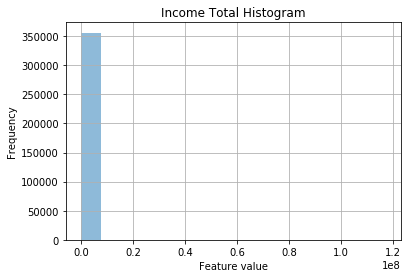

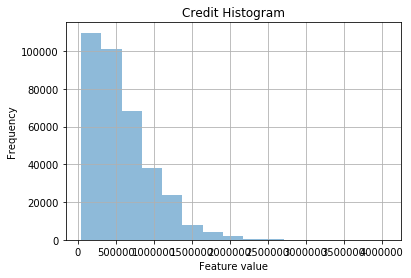

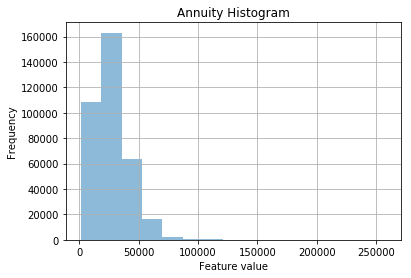

In [692]:
# Visualize skewed continuous features of original data
data['AMT_INCOME_TOTAL'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Income Total Histogram")
plt.show()

data['AMT_CREDIT'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Credit Histogram")
plt.show()

data['AMT_ANNUITY'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Annuity Histogram")
plt.show()



For highly-skewed feature distributions such as `'AMT_CREDIT'` and `'AMT_ANNUITY'`, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers 

In [693]:
# Log-transform the skewed features
skewed = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
features_log_transformed = pd.DataFrame(data = data)
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

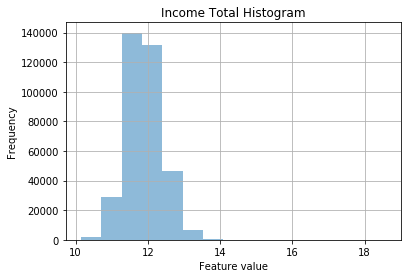

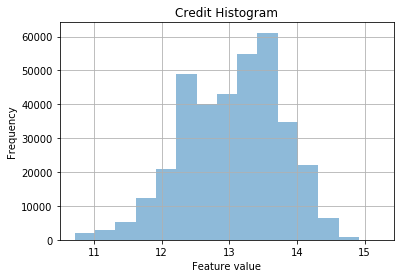

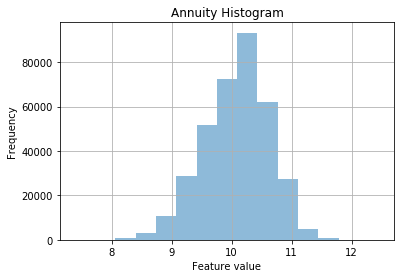

In [694]:
# Visualize after log transformation
features_log_transformed['AMT_INCOME_TOTAL'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Income Total Histogram")
plt.show()

features_log_transformed['AMT_CREDIT'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Credit Histogram")
plt.show()

features_log_transformed['AMT_ANNUITY'].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Annuity Histogram")
plt.show()

In [695]:
features_log_transformed.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,...,ratio_credit_to_annuity,ratio_credit_to_goods,ratio_credit_to_income,ratio_days_employed,ratio_income_credit,ratio_income_per_child,ratio_income_per_person,ratio_payment_rate,ratio_phone_to_birth,ratio_phone_to_employ
0,10.114619,12.915581,12.768544,12.218500,0,1.0,M,-9461,637,-2120,...,16.461104,1.158397,2.007889,-0.067329,0.498036,202500.0,202500.0,0.060749,0.119860,-1.780220
1,10.482892,14.072865,13.937287,12.506181,0,2.0,F,-16765,1188,-291,...,36.234085,1.145199,4.790750,-0.070862,0.208736,270000.0,135000.0,0.027598,0.049389,-0.696970
2,8.817446,11.813037,11.813037,11.119898,0,1.0,M,-19046,225,-2531,...,20.000000,1.000000,2.000000,-0.011814,0.500000,67500.0,67500.0,0.050000,0.042791,-3.622222
3,10.298481,12.652947,12.601491,11.813037,0,2.0,F,-19005,3039,-2437,...,10.532818,1.052803,2.316167,-0.159905,0.431748,135000.0,67500.0,0.094941,0.032465,-0.203027
4,9.992711,13.148033,13.148033,11.707678,0,1.0,M,-19932,3038,-3458,...,23.461618,1.000000,4.222222,-0.152418,0.236842,121500.0,121500.0,0.042623,0.055489,-0.364055


### Normalizing Numerical Features


In [696]:
#get all features that 
numerical_features_all = [col for col in features_log_transformed.columns if features_log_transformed[col].dtype != 'object' 
                and col.find('FLAG') != 0
                and col != 'TARGET'
                and col != 'SK_ID_CURR'
               ]

#find features where its values > 1 or < -1 for scaling in next step
a= [col for col in numerical_features_all if (np.where(features_log_transformed[col] > 1)[0].shape[0] > 0)] 
b= [col for col in numerical_features_all if (np.where(features_log_transformed[col] < -1)[0].shape[0] > 0)]

numerical_features = a + b

print('We will normalize only ', len(numerical_features), 'out of', len(numerical_features_all), 'numerical features')


We will normalize only  26 out of 39 numerical features


In [697]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical_features] = scaler.fit_transform(features_log_transformed[numerical_features])
features_log_minmax_transform.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,...,ratio_credit_to_annuity,ratio_credit_to_goods,ratio_credit_to_income,ratio_days_employed,ratio_income_credit,ratio_income_per_child,ratio_income_per_person,ratio_payment_rate,ratio_phone_to_birth,ratio_phone_to_employ
0,0.537494,0.489166,0.468924,0.245232,0.0,0.00,M,0.881337,0.035563,0.705433,...,0.226047,0.172376,0.023640,0.998583,0.002338,0.003410,0.005121,0.060749,0.119860,0.999094
1,0.610092,0.746352,0.722714,0.279376,0.0,0.05,F,0.473087,0.066324,0.959566,...,0.756604,0.170120,0.056483,0.998509,0.000947,0.004564,0.003390,0.027598,0.049389,0.999645
2,0.281783,0.244144,0.261437,0.114839,0.0,0.00,M,0.345593,0.012561,0.648326,...,0.321005,0.145299,0.023547,0.999752,0.002347,0.001103,0.001659,0.050000,0.042791,0.998156
3,0.573739,0.430800,0.432648,0.197108,0.0,0.05,F,0.347884,0.169663,0.661387,...,0.066977,0.154325,0.027278,0.996634,0.002019,0.002257,0.001659,0.094941,0.032465,0.999897
4,0.513463,0.540824,0.551329,0.184602,0.0,0.00,M,0.296071,0.169607,0.519522,...,0.413888,0.145299,0.049774,0.996791,0.001082,0.002026,0.003043,0.042623,0.055489,0.999815


### One-hot Encoding

Note that the dataset contains many categorical features. These features need to be encoded to binary representations as many of learning algorithms expect numerical values and cannot work with categorical values. 

In [698]:
#Convert categorical features into numerical representation
features_final = pd.get_dummies(features_log_minmax_transform)

In [699]:
# Generate new csv
application_train = features_final[:train_size_].copy()
application_test = features_final[train_size_:].copy()
application_test.drop(columns = ['TARGET'], inplace=True)
application_train.to_csv('data/application_train_final.csv', index=False)
application_test.to_csv('data/application_test_final.csv', index=False)

### Data Shuffle & Split

In [608]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split target and features data
application_train = features_final[:train_size_].copy()
target = application_train['TARGET']
application_train = application_train.drop('TARGET', axis = 1)
application_train = application_train.drop('SK_ID_CURR', axis = 1) # Remove application id from features
application_train.shape[0]
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(application_train, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

print(y_train)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

125699    0.0
51543     0.0
276701    1.0
244781    0.0
98093     0.0
118141    0.0
18544     0.0
234566    0.0
157140    0.0
194641    0.0
70603     0.0
43685     0.0
69785     1.0
106186    0.0
188075    0.0
193301    0.0
39982     0.0
88934     0.0
78212     0.0
75861     0.0
176993    0.0
163458    0.0
109271    0.0
200529    0.0
260406    0.0
306961    0.0
261656    0.0
33409     0.0
219253    0.0
207486    0.0
         ... 
190538    0.0
274126    0.0
228041    0.0
125715    0.0
303935    0.0
84741     0.0
183718    0.0
122251    0.0
221804    0.0
200001    0.0
49852     0.0
230336    0.0
31949     0.0
73203     0.0
7883      0.0
82532     0.0
255886    0.0
220956    0.0
150192    0.0
17102     1.0
80260     0.0
170737    0.0
212223    0.0
211728    0.0
86373     0.0
122686    0.0
304424    1.0
152453    0.0
118058    0.0
306002    0.0
Name: TARGET, Length: 215257, dtype: float64
Training set has 215257 samples.
Testing set has 92254 samples.


### Model Performance 

In [185]:

TP = np.sum(target) # Counting the ones as this is the naive case. 
FP = target.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + (beta**2)) * ((precision * recall) / ((beta**2 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.04}, F-score: {:.04}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.08074, F-score: 0.09892]


### Model Evaluation

Now the dataset looks ready to be used to training the model and testing it after completing the preprocessing steps. Numerical features in the dataset has been normalized and scaled between 0 to 1. Likewise, categorical features have been encoded for the algorithm to understand. Next step is to find the best algorithm that fits this problem properly and efficiently.

There are many classification models that will help predicting default home loan risk. For this project, the below models will be used to identify the best fitting model.

    - Nearest Neighbors
    - Linear Support Vector Machine (SVM)
    - Radial Basis Function Support Vector Machine (RBF SVM)
    - Gaussian Process 
    - Decision Tree 
    - Random Forest 
    - Multi-layer Perceptron
    - AdaBoost
    - Gaussian Naive Bayes
    - Quadratic Discriminant Analysis
    - Logistic Regression
    

In [186]:
#Lets import classification models that predicats a binary target 
from sklearn.neural_network import MLPClassifier #NN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

#initialize classifiers
AB = LogisticRegression(random_state=48)
AB.fit(X_train, y_train)
classifiers = [
    #('Gaussian Process', GaussianProcessClassifier(1.0 * RBF(1.0))),
    #('Random Forest', RandomForestClassifier(n_estimators=100)), #(max_depth=5, n_estimators=10, max_features=1)),
    #('Multi-layer Perceptron', MLPClassifier(alpha=1)),
    #('AdaBoost', AdaBoostClassifier()),
    #('Gaussian Naive Bayes', GaussianNB()),
    #('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    #('Decision Tree', DecisionTreeClassifier(random_state=48)),
    #('Nearest Neighbors', KNeighborsClassifier(3)),
    #('Logistic Regression', LogisticRegression(random_state=48))

    ]

In [187]:
# make class predictions for the testing set
y_pred_class = AB.predict(X_test)

In [188]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()


0    84605
1     7561
Name: TARGET, dtype: int64

In [189]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.08203675975956426

In [190]:
# calculate the percentage of zeros
1 - y_test.mean()

0.9179632402404357

In [191]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.9179632402404357

This means that a dumb model that always predicts 0 would be right 91% of the time

This shows how classification accuracy is not that good as it's close to a dumb model
It's a good way to know the minimum we should achieve with our models

In [164]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.917963
Name: TARGET, dtype: float64

In [165]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
False: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [166]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[84604     1]
 [ 7561     0]]


In [167]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [168]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[84604     1]
 [ 7561     0]]


In [169]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9179523902523707
0.9179523902523707


In [153]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.9119523468524184
0.9119523468524184


In [154]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.9960322708636423
0.9960322708636423


In [155]:
specificity = TN / (TN + FP)

print(specificity)

0.006902665327108327


In [156]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.9930973346728916
0.9930973346728916


In [157]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.0822592624956309
0.0822592624956309
